# Calculaction of the probability of the disease transmission per contact
Here is the code that generates graphs presented in the thesis in the chapter 2.3.

Tutaj liczę prawdopodobieństwo przyjmując że $\sigma^2$ we wzorze z coursera to wariancja stopnia wierzchołka $k$, $k$ to średnia liczba kontaktów jaką ma wierzchołek

In [1]:
class node():
    def __init__(self,id):
        self.id=id
        self.neighbours=[]
        self.degree=0 #degree ile ma ziomków
        self.k=0 #k number of contacts
    def new_contact(self,node2):
        self.k+=1
        if node2 in self.neighbours:
            pass
        else:
            self.neighbours.append(node2)
            self.degree+=1

In [2]:
class network():
    def __init__(self,nodes,R_0): #chwila zerowa nic się nie dzieje
        self.nodes=nodes
        self.variance=0
        self.time=0
        self.R_0=R_0 #basic reproduction number
        self.pr=0 
        self.n_k_average=0
    def new_contact(self,node1,node2,time):
        node1.new_contact(node2)
        node2.new_contact(node1)
        self.time=time
    def count_n_k_average(self): #number of contacts on average
        k_a=[]
        for i in nodes:
            k_a.append(i.k)
        self.n_k_average=sum(k_a)/len(k_a)
    def count_variance(self):
        ks=[]
        for i in self.nodes:
            ks.append(i.k)
        self.variance=sum((xi - sum(ks)/len(ks)) ** 2 for xi in ks) / len(ks)
    def probability(self): #probability of disease transmission per contact
        self.count_n_k_average()
        self.count_variance()
        self.pr=self.R_0/(self.n_k_average+self.variance/self.n_k_average)
    def clear_nodes(self):
        for i in self.nodes:
            i.neighbours=[]
            i.degree=0
            i.k=0

In [3]:
#dla każdej chwili czasu policz ile wynosi to prawdopodbieństwo
def return_pr_in_time(R_0,nodes,contacts,stop,hist): # to zwraca prawdopodobieństwa w funkjci czasu i kontakty w czasie
    net=network(nodes,R_0)
    net.clear_nodes()
    probs=[]
    previous_time=net.time
    times=[]
    nr_of_contacts=[]
    variance=[]
    for i in range(0,stop): #tutaj dodaję każdy kontakt i patrzę ile wynosi dla niego prawdopodobieństwo zarażenia
        net.new_contact(contacts[i][1],contacts[i][2],contacts[i][0]) #(node1,node2,time)
        net.probability()
        if net.time !=previous_time: #ten warunek jest po to, że jakby w jednym momencie się spotakało kilka osób, to zaisuję
        #prawdopodobieństwo po wszystkich trzech kontaktach w danej chwili a nie po każdym po kolei
            times.append(net.time/60/60/24)
            probs.append(net.pr)
            nr_of_contacts.append(net.n_k_average)
            variance.append(net.variance)
        
        previous_time=net.time
    if hist==True:
        ks=[]
        for i in net.nodes:
            ks.append(i.k)
        plt.hist(ks)
    
    return (probs,times,nr_of_contacts,variance)

In [4]:
def count_period_for_pr(probs,times,Pr,accuracy): #tutaj szukam okresu, dla którego prawdopodobieństwo w sieci jest poodbnedo zadanego
    prs=[]
    ts=[]
    for i in range(0,len(probs)):
        if Pr-accuracy<=probs[i]<=Pr+accuracy:
            prs.append(probs[i])
            ts.append(times[i])
    return (prs,ts)

In [5]:
data=open("C:/Users/wojci/Documents/Studia/praca/DANE/dane.txt","r")
data=data.readlines()
contacts=[]
nodes=[]
#OBRÓBKA DANYCH
for i in range(0,len(data)):
    row=data[i]
    row=row.split()
    nodes.append(int(row[1]))
    nodes.append(int(row[2]))
nodes=set(nodes)
nodes=list(nodes)  #tak otrzymuję wszystkie wierzchołki jakie są w sieci podczas całego badania

##############################
#tu chcę zapisać każdy wierzchołek i kontakt między nimi za pomocą klasy

for i in range(0,len(nodes)): #teraz każdy wierzchołek staje się wierzchołkiem według klasy
    nodes[i]=node(nodes[i])
    
for i in range(0,len(data)):
    row=data[i]
    row=row.split()
    for j in range(0,len(nodes)):
        if nodes[j].id==int(row[1]):
            c1=nodes[j]
    for j in range(0,len(nodes)):
        if nodes[j].id==int(row[2]):
            c2=nodes[j]
    contacts.append((int(row[0]),c1,c2)) #i teraz kontakty mamy w postaci (czas, node1,node2)

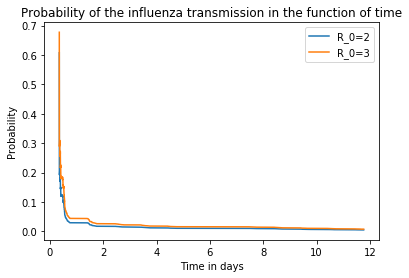

In [7]:
import pylab
import matplotlib.pyplot as plt
(probs1,times1,nr_of_contacts1,var1)=return_pr_in_time(2,nodes,contacts,len(contacts),False)
(probs2,times2,nr_of_contacts2,var2)=return_pr_in_time(3,nodes,contacts,len(contacts),False)

#pylab.scatter(times1[11:],probs1[11:],label="R_0=2, real data",s=6)
#pylab.scatter(times2[12:],probs2[12:],label="R_0=3, real data",s=6)
#pylab.scatter(times3,probs3,label="R_0=4, real data",s=6)
plt.plot(times1[11:],probs1[11:],label="R_0=2")
plt.plot(times2[12:],probs2[12:],label="R_0=3")
#pylab.plot(times3,probs3,label="R_0=4")
plt.title("Probability of the influenza transmission in the function of time")
plt.xlabel("Time in days")
plt.ylabel("Probability")
plt.legend()
a=plt.gcf()
#a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/prob/proballtime2.eps")
plt.show()


#przerwy to dni wolne itp.

Dla pierwszych 11 obserwacji liczenie tego prawdopodbieństwa nie ma sensu bo wychodzi ponad 1

Niżej na wykresie etap nr 1

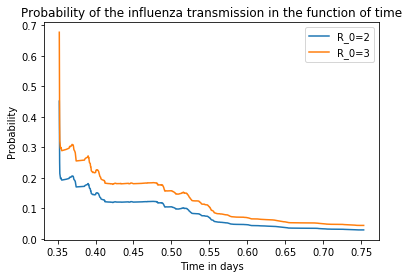

In [8]:
a=12
b=744
import matplotlib.pyplot as plt
#pylab.scatter(times1[a:b],probs1[a:b],label="R_0=2, real data",s=6)
#pylab.scatter(times2[a:b],probs2[a:b],label="R_0=3, real data",s=6)
#pylab.scatter(times3,probs3,label="R_0=4, real data",s=6)
plt.plot(times1[a:b],probs1[a:b],label="R_0=2")
plt.plot(times2[a:b],probs2[a:b],label="R_0=3")
#pylab.plot(times3,probs3,label="R_0=4")
plt.title("Probability of the influenza transmission in the function of time")
plt.xlabel("Time in days")
plt.ylabel("Probability")
plt.legend()
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/prob/prob_first_day.eps")
plt.show()


To jest rozkład pierwszy dzień eksperymentu, prawdopodobieństwo dla R_0=2 wynosi 0.03, a dla R_0=3 0.04, wariancja na koniec dnia wynosi 1072, średnia liczba kontaktów 25

Text(0.5,1,'K distribution after first day')

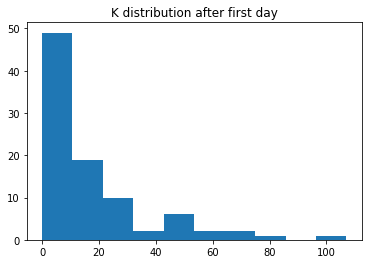

In [65]:
(a,b,c,d)=return_pr_in_time(2,nodes,contacts,744,True)
plt.title("K distribution after first day")

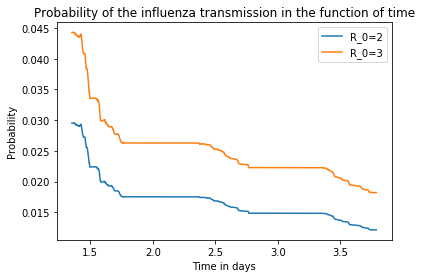

In [10]:
a=744
b=2836
#pylab.scatter(times1[a:b],probs1[a:b],label="R_0=2, real data",s=6)
#pylab.scatter(times2[a:b],probs2[a:b],label="R_0=3, real data",s=6)
#pylab.scatter(times3,probs3,label="R_0=4, real data",s=6)
plt.plot(times1[a:b],probs1[a:b],label="R_0=2")
plt.plot(times2[a:b],probs2[a:b],label="R_0=3")
#pylab.plot(times3,probs3,label="R_0=4")
plt.title("Probability of the influenza transmission in the function of time")
plt.xlabel("Time in days")
plt.ylabel("Probability")
plt.legend()
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/prob/prob_three_days.eps")
plt.show()

Po kolejnych trzech dniach pr spada do 0.012 (R_0=2) i 0.018 dla (R_0=3), wariancja wynosi 6762, a średnia liczba kontaktów 86

Text(0.5,1,'K distribution after fourth day')

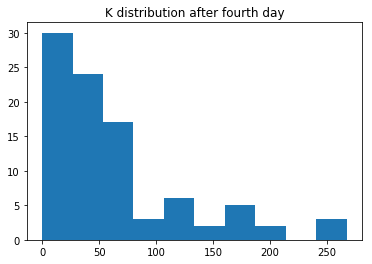

In [96]:
(a,b,c,d)=return_pr_in_time(2,nodes,contacts,2836,True)
plt.title("K distribution after fourth day")

To jest etap nr 2, prawdopodobieństwo spada do 0.06932409012131717, a wariancja wynosi 195

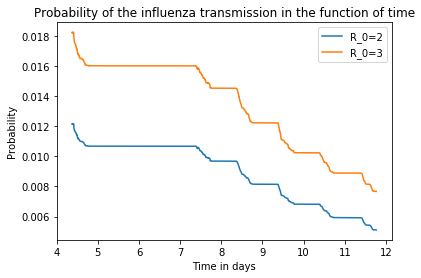

In [12]:
a=2837
b=5000
#pylab.scatter(times1[a:],probs1[a:],label="R_0=2, real data",s=6)
#pylab.scatter(times2[a:],probs2[a:],label="R_0=3, real data",s=6)
#pylab.scatter(times3,probs3,label="R_0=4, real data",s=6)
plt.plot(times1[a:],probs1[a:],label="R_0=2")
plt.plot(times2[a:],probs2[a:],label="R_0=3")
#pylab.plot(times3,probs3,label="R_0=4")
plt.title("Probability of the influenza transmission in the function of time")
plt.xlabel("Time in days")
plt.ylabel("Probability")
plt.legend()
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/prob/prob_twelve_days.eps")
plt.show()

i tu na koniec eksperymentu pr dla R_0=2 wynosi 0.005 dla R_0=3 0.007, a wariancja 37932, wtedy też średnia liczba kontaktów wynosi 213

Text(0.5,1,'K distribution at the end')

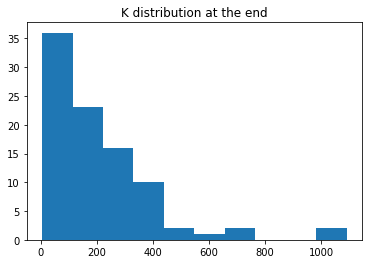

In [108]:
(a,b,c,d)=return_pr_in_time(2,nodes,contacts,len(contacts),True)
plt.title("K distribution at the end")

Text(0.5,1,'Średnia liczba kontaktów w czasie')

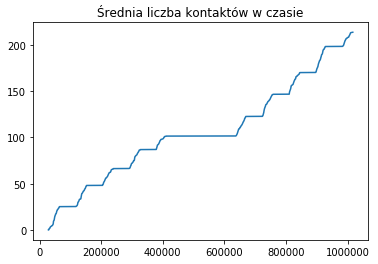

In [110]:
plt.plot(times1,nr_of_contacts1)
plt.title("Średnia liczba kontaktów w czasie")


Text(0.5,1,'Wariancja w czasie')

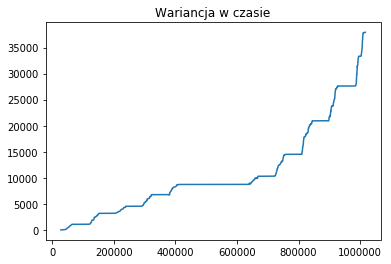

In [111]:
plt.plot(times1,var1)
plt.title('Wariancja w czasie')

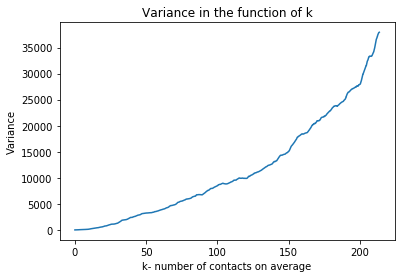

In [20]:
plt.plot(nr_of_contacts1,var1)
plt.xlabel('k- number of contacts on average')
plt.ylabel('Variance')
plt.title('Variance in the function of k')
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/prob/var_in_f_k.eps")
plt.show()

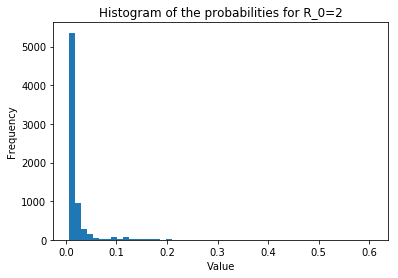

In [16]:
plt.hist(probs1[11:],bins=50)
plt.title("Histogram of the probabilities for R_0=2") 
plt.ylabel('Frequency')
plt.xlabel('Value')
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/prob/hist_prob2.eps")
plt.show()

7000 razy wsytępuje 0.005 dla $R_0=2$, a 7104 mam różnych chwil, kontaktów jest więcej 9827, bo w niektórych chwilach było kilka kontaktów

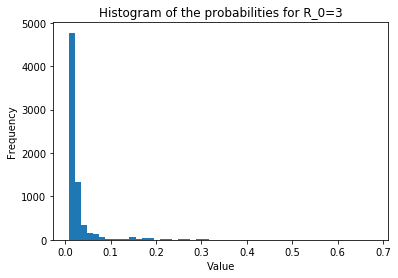

In [18]:
plt.hist(probs2[12:],bins=50)
plt.title("Histogram of the probabilities for R_0=3") 
plt.ylabel('Frequency')
plt.xlabel('Value')
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/prob/hist_prob3.eps")
plt.show()

tutaj dla R_0=3 najczęsciej występuje 0.007

Każda siec jest inna, w tamtym artykule uzyskali 0.003, u mnie myślę, że można przyjąc 0.006 co w sumie jest dosyć blisko tamtego wyniku...

In [10]:
R_0=2
net=network(nodes,R_0)
net.clear_nodes()
for i in range(0,len(contacts)): 
        net.new_contact(contacts[i][1],contacts[i][2],contacts[i][0]) 

In [11]:
number_of_contacts=[]
for i in net.nodes:
    number_of_contacts.append(i.k)

%store number_of_contacts

Stored 'number_of_contacts' (list)


In [14]:
index=number_of_contacts.index(max(number_of_contacts))
number_of_contacts.pop(66)
index2=number_of_contacts.index(max(number_of_contacts))
number_of_contacts.pop(34)
index3=number_of_contacts.index(max(number_of_contacts))
print('Pierwsze maksimum indeks:',index,'Liczba kontaktów',net.nodes[66].k)
print('Drugie maksimum indeks:', index2,'Liczba kontaktów',net.nodes[34].k)
print('Trzecie maksimum indeks',index3,'Liczba kontaktów',net.nodes[11].k)
#66 wierzchołek ma najwięcej kontaktów jest to 1091 i ma id 271

Pierwsze maksimum indeks: 11 Liczba kontaktów 1091
Drugie maksimum indeks: 11 Liczba kontaktów 994
Trzecie maksimum indeks 11 Liczba kontaktów 736


In [30]:
#liczbę kontaktów w czasie dla wierzchołka 66
R_0=2
net=network(nodes,R_0)
net.clear_nodes()
k66=[0]
k34=[0]
k11=[0]
times=[0]
previous_time=net.time
for i in range(0,len(contacts)): 
        net.new_contact(contacts[i][1],contacts[i][2],contacts[i][0]) 
        if net.time !=previous_time: #ten warunek jest po to, że jakby w jednym momencie się spotakało kilka osób, to zaisuję
        #prawdopodobieństwo po wszystkich trzech kontaktach w danej chwili a nie po każdym po kolei
            times.append(net.time)
            k66.append(net.nodes[66].k)#-k66[-1])
            k34.append(net.nodes[34].k)#-k34[-1])
            k11.append(net.nodes[11].k)#-k11[-1])


Stored 'a1' (Line2D)
Stored 'a2' (Line2D)
Stored 'a3' (Line2D)


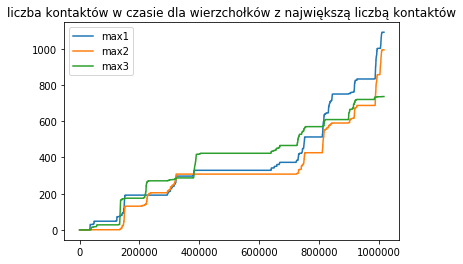

In [37]:
import matplotlib.pyplot as plt
#f, (ax1, ax2,ax3) = plt.subplots(3, 1, sharey=True)
a1 , =plt.plot(times,k66,label='max1')
a2 , =plt.plot(times,k34,label='max2')
a3 , =plt.plot(times,k11,label='max3')
plt.legend(handles=[a1,a2,a3])
plt.title('liczba kontaktów w czasie dla wierzchołków z największą liczbą kontaktów')
%store a1
%store a2
%store a3

Ten wierzchołek miał największą liczbę kontaktów, jednak ta liczba kontaktów rośnie bardziej gwałtownie na koniec eksperymentu, na początku kiedy zarażam nie ma tak dużej częstotliwości kontaktó, dlatego też widać że nie ma aż takiej dużej 'zaraźliwości' w mojej symulacji(arkusz) symulacja